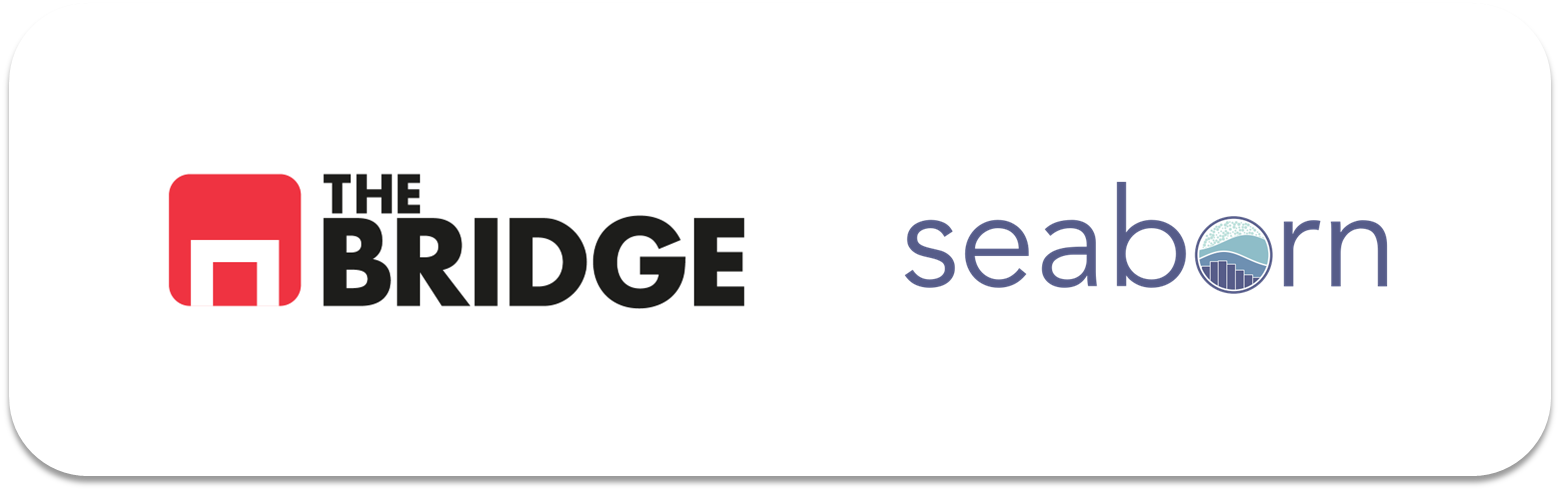

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math


## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
df_cities = pd.read_csv("./data/california_cities.csv")

df_cities.head()

Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  
1          20.260         20.184           0.076                0.37  
2          59.465         27.482          31.983               53.79  
3          14.155          4.632           9.524               67.28  
4          19.766         19.763           0.003                0.01

In [ ]:
df_cities.info() # vemos que hay varias columnas con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [ ]:
cities = df_cities.copy() # guardamos una copia antes de borrar filas con nulos

df_cities.dropna(axis= "index", inplace=True)
df_cities.info() # comprobamos que hemos limpiado todos los nulos

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [ ]:
# me traigo la función que creé en el notebook de ejercicios del workout: 

def compara_scatterplot(dataframe, col_num_1, col_num_2, col_cat = None, size = None):
    
    sns.scatterplot(x= col_num_1, y= col_num_2, size = size, data = dataframe, hue = col_cat)

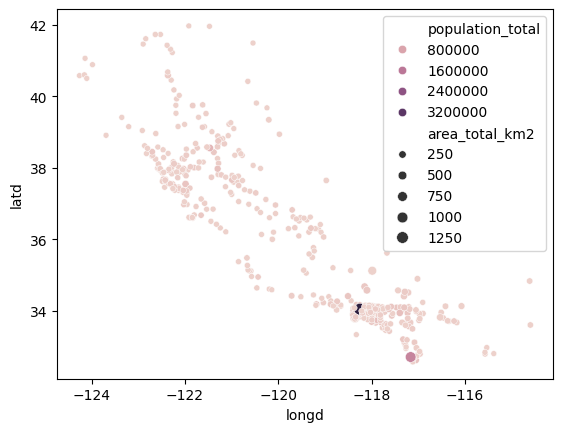

In [ ]:
# observamos un primer resultado.
compara_scatterplot(df_cities, "longd", "latd", col_cat= "population_total", size= "area_total_km2")

In [ ]:
# introduzco el sexto argumento 'escala', aunque no tengo muy clara esta parte del enunciado...

def scatterplot_plus(dataframe, col_num_1, col_num_2, col_cat = None, size = None, scale = 1):

    fig, axs = plt.subplots(figsize= (20,16))

    if type(size) == int:
    
        sns.scatterplot(x= col_num_1, y= col_num_2, size = size, data = dataframe, hue = col_cat)
    
    elif type(size) == str:
        sns.scatterplot(x= col_num_1, y= col_num_2, size = dataframe[size] * scale, data = dataframe, hue = col_cat)
    
    return axs

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

In [33]:
df_cities["log_poblacion"] = np.log10(df_cities["population_total"])

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

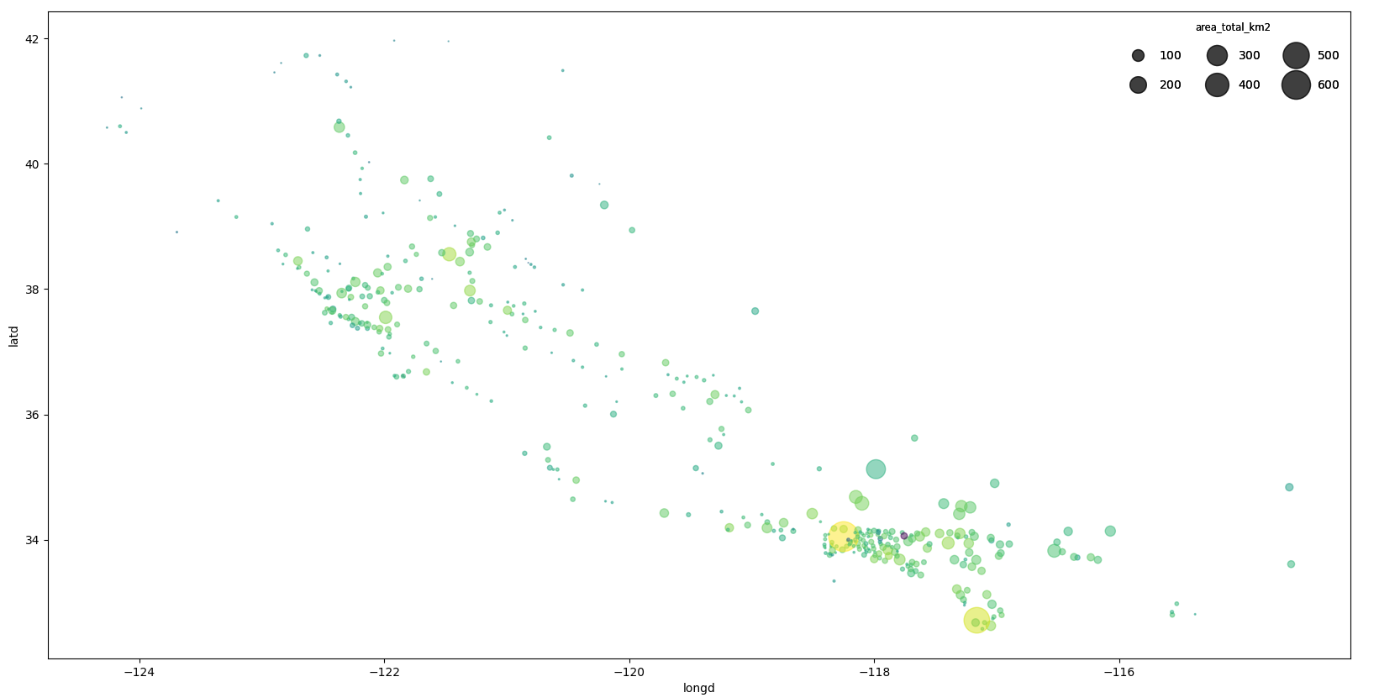

<Axes: xlabel='longd', ylabel='latd'>

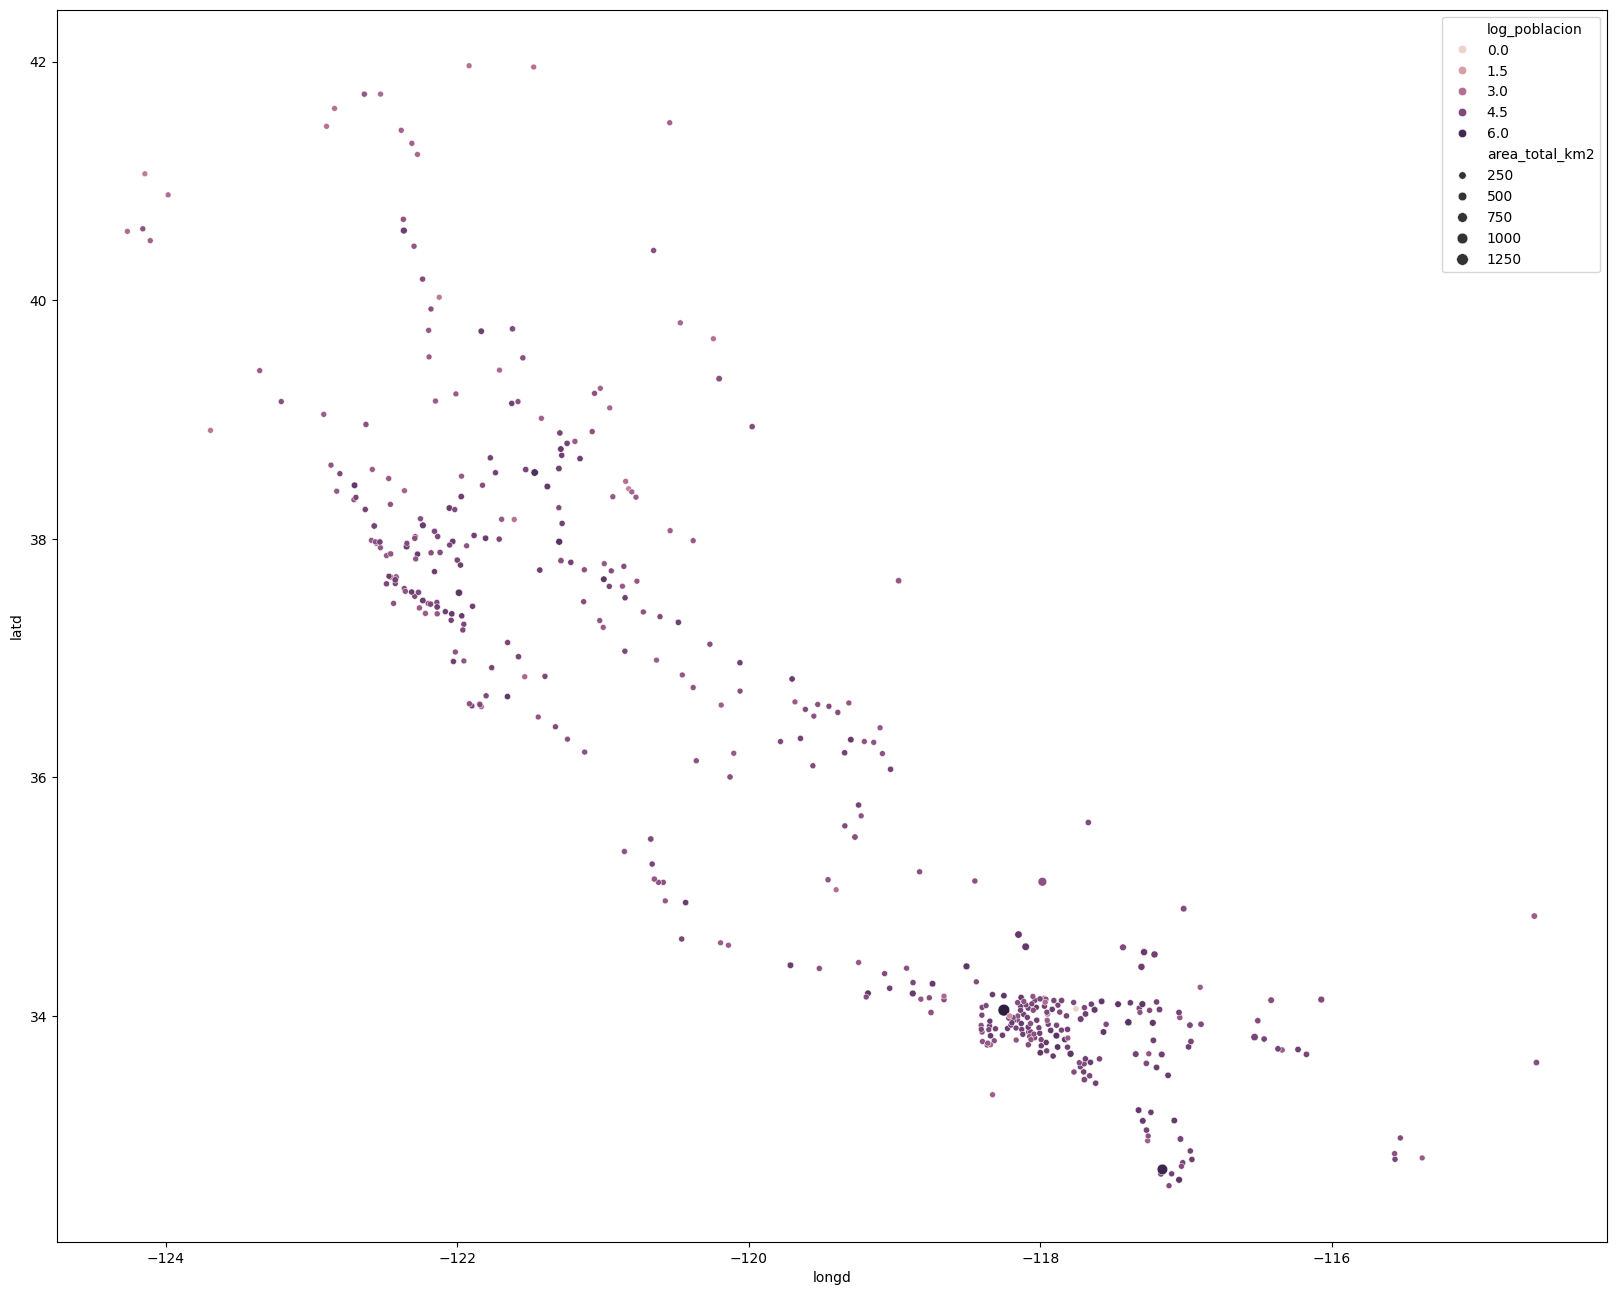

In [45]:
scatterplot_plus(df_cities, col_num_1= "longd", col_num_2= "latd", col_cat= "log_poblacion", size="area_total_km2")

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

    Primero genero las gráficas para la visualización de datos durante el análisis; seguido de la generación de posibles gráficas que incluiré en mi presentación.

    1. El titanic fue un accidente con una tasa de mortalidad alta.

In [46]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [ ]:
df_titanic.alive.value_counts()    # las frecuencias absolutas indican que los fallecidos superaron a los supervivientes

alive
no     549
yes    342
Name: count, dtype: int64

Text(0.5, 1.0, "Frecuencias absolutas 'Alive'")

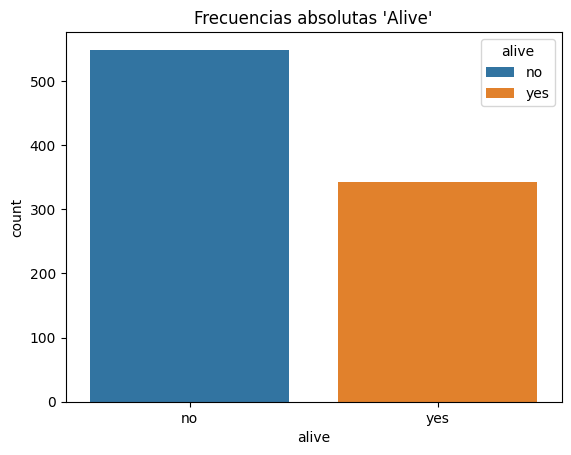

In [ ]:
# pintamos los valores para visualizarlos:

fig, axs = plt.subplots()
sns.countplot(x= "alive", data=df_titanic, hue="alive", legend= True)
axs.set_title("Frecuencias absolutas 'Alive'")

In [ ]:
# Pero lo que realmente nos interesa es obtener las frecuencias relativas.
# Primero obtenemos los porcentajes:

porcentaje_supervivencia = df_titanic.alive.value_counts(normalize=True)*100
porcentaje_supervivencia

alive
no     61.616162
yes    38.383838
Name: proportion, dtype: float64

    CANDIDATOS A APARECER EN LA PRESENTACIÓN -->

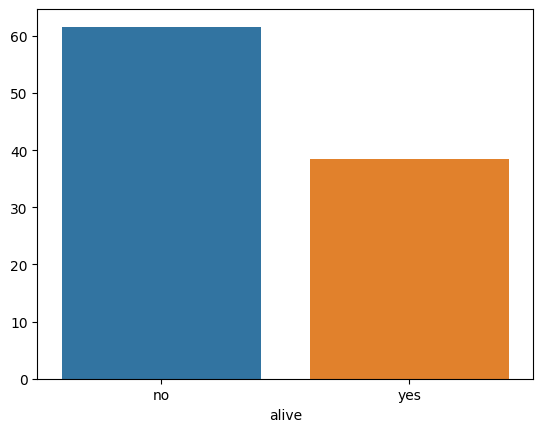

In [62]:
# Y luego los pintamos:

sns.barplot(x = porcentaje_supervivencia.index, y = porcentaje_supervivencia.values, hue = porcentaje_supervivencia.index) # x = indice de la variable / y = valores de la variable
axs.set_title("Frecuencias relativas 'alive'")
axs.set_ylabel("%");

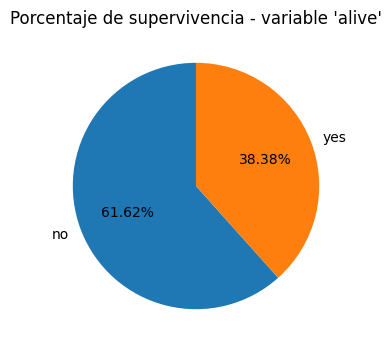

In [113]:
# otra tipo de gráfica:

data = df_titanic["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90)
ax.set_title("Porcentaje de supervivencia - variable 'alive'");

    PORTADA

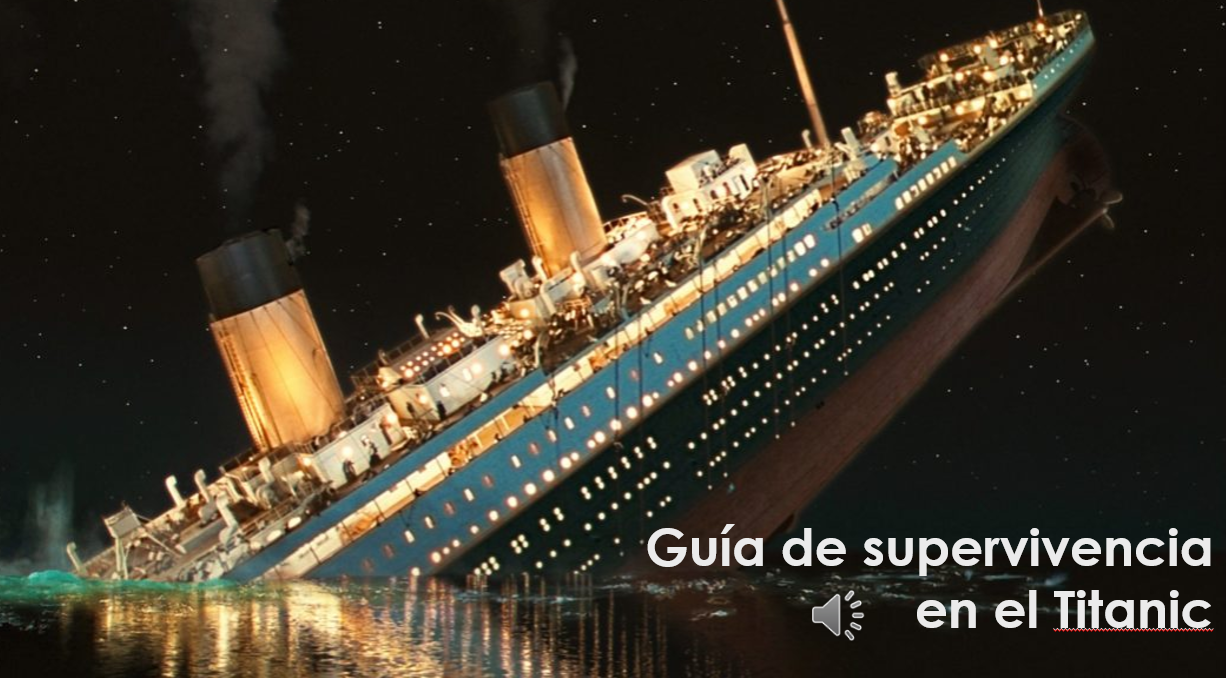

    SLIDE 1

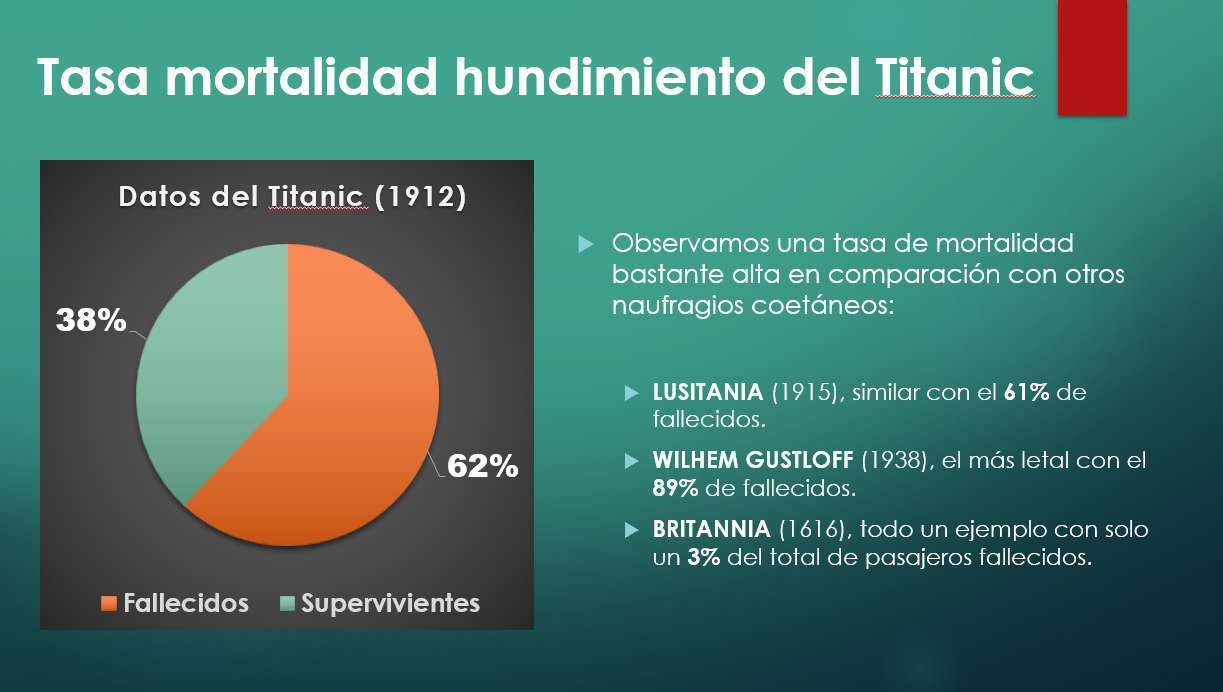

    2. Mujeres y niños primero.

    Hacemos lo mismo que en el apartado anterior, pintamos las frecuencias absolutas y relativas , pero esta vez mediante el análisis bivariante de 'alive' y 'who':

In [ ]:
## FRECUENCIAS ABSOLUTAS:

# Me traigo las funciones creadas en los ejercicios del workout para mostrar los valores y visualizar la relación entre ambas variables categóricas:

def pinta_categoricas(dataframe, columnas = []):
                     
    fig,axs = plt.subplots(nrows= math.ceil(len(columnas) / 2) , ncols=2, figsize=(10,6))    ## 1)
    axs = axs.flatten()    ## 2)
    
    for indice, variable in enumerate(columnas):
        
        sns.countplot(x= variable, data = dataframe, ax = axs[indice], hue = variable, legend = False)
        axs[indice].set_title(f"Frecuencias absolutas de '{variable}':")

    fig

# Creo una función exclusivamente para crear tablas de contingencia:

def tabla_contingencia(dataframe, columna_1, columna_2):
        
    tabla_contingencia = pd.crosstab(dataframe[columna_1],
                                    dataframe[columna_2],
                                    margins = False)

    return tabla_contingencia

# Monto mi función principal llamando a las dos anteriores: 
def combina_categoricas(dataframe, columna_1, columna_2):
    
    pinta_categoricas(dataframe, [columna_1, columna_2])            # llamo a esta función para obtener la distribución de frecuencias absolutas por separado

    sns.catplot(x = columna_1,                                      # creo un catplot combinando ambas categóricas, de manera que me devuelva la distribución de valores de la 
                col = columna_2,                                    # columna_1 en función de los diferentes valores de la columna_2
                kind = "count",
                orient = "V",
                hue = columna_1,
                legend = True,
                data = dataframe)
    
    return tabla_contingencia(dataframe, columna_1, columna_2)      # llamo a mi función tabla_contingencia() como retorno 
    
    

who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205

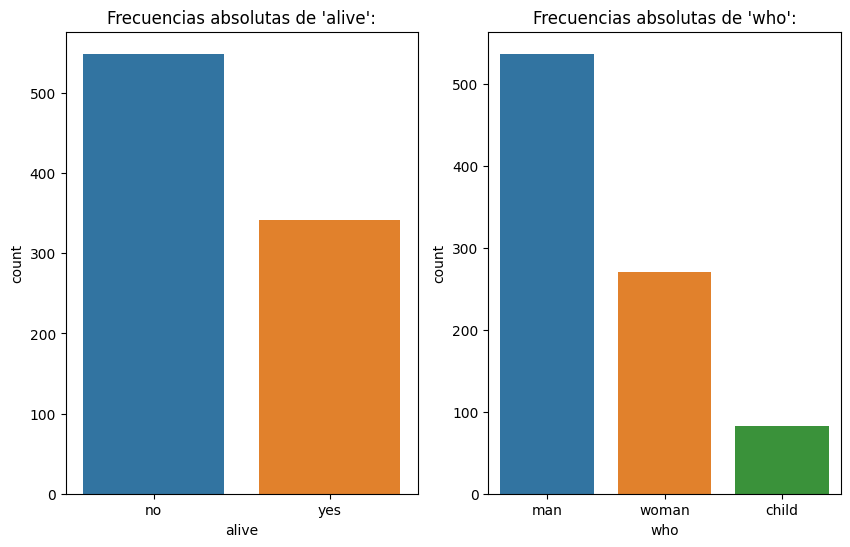

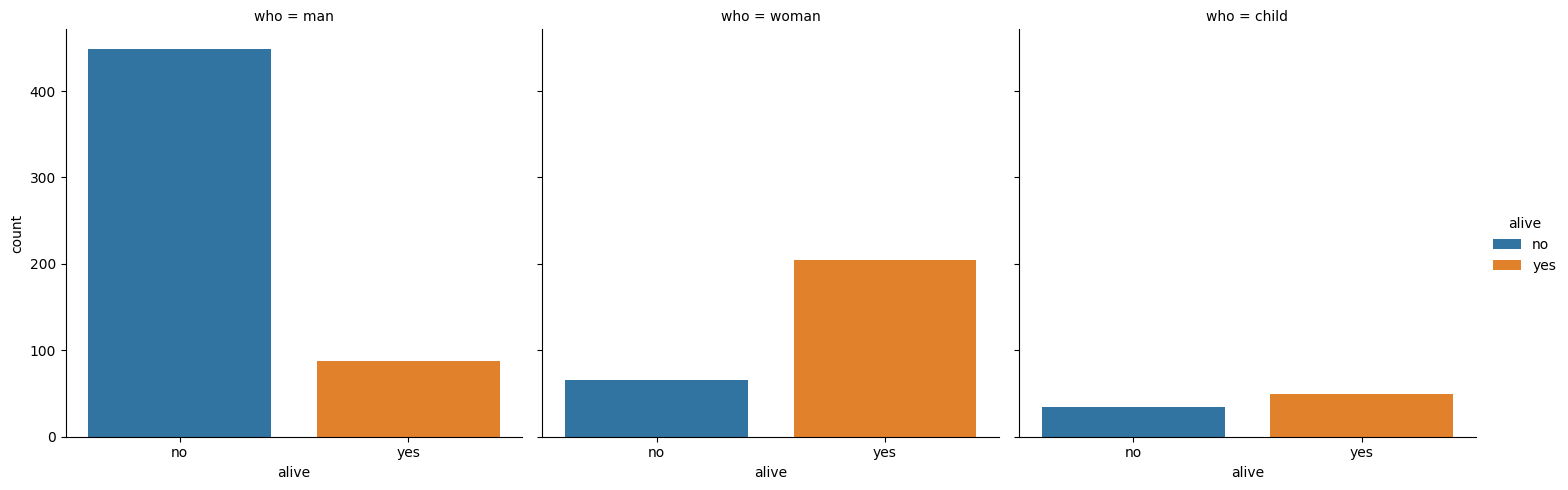

In [77]:
combina_categoricas(df_titanic,"alive", "who")

In [ ]:
df_titanic.who.value_counts(normalize=True)*100   # destacaremos el valor que representa el % de hombres a bordo

who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64

In [121]:
cat_colx = "alive"
cat_coly = "who"

frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas 

who alive  proportion
0  child   yes    0.590361
1  child    no    0.409639
2    man    no    0.836127
3    man   yes    0.163873
4  woman   yes    0.756458
5  woman    no    0.243542

In [ ]:
frecuencias_relativas.proportion *=100  # multiplicamos la columna proportion * 100 para obtener los porcentajes de supervivencia por cada valor de 'who'
frecuencias_relativas

who alive  proportion
0  child   yes   59.036145
1  child    no   40.963855
2    man    no   83.612663
3    man   yes   16.387337
4  woman   yes   75.645756
5  woman    no   24.354244

    CANDIDATO PARA LA VISUALIZACIÓN EN LA PRESENTACIÓN -->

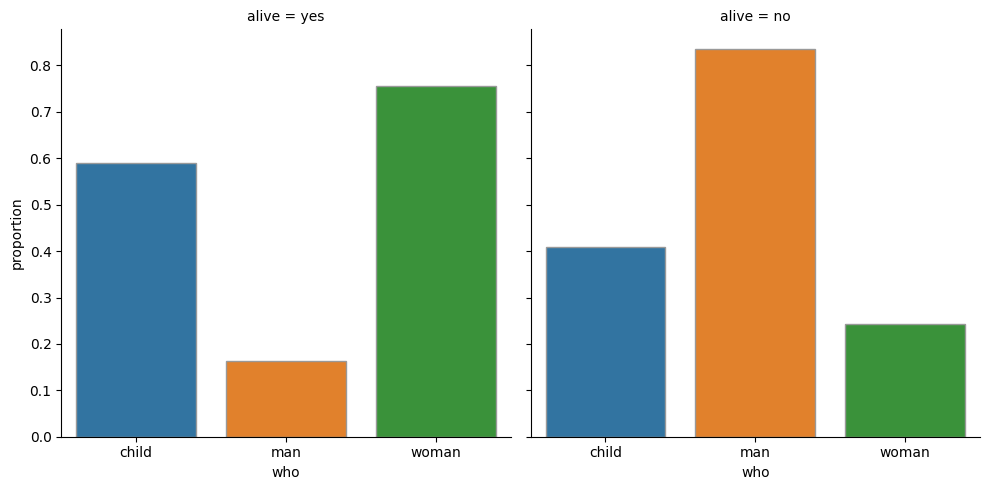

In [ ]:
sns.catplot(x="who",
            y = "proportion",
            col="alive",
            hue = "who",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

# me quedo con esta gráfica para mi slide # 2, solo con los porcentajes de 'yes'

In [98]:
tabla_cont = tabla_contingencia(df_titanic, "alive", "who")

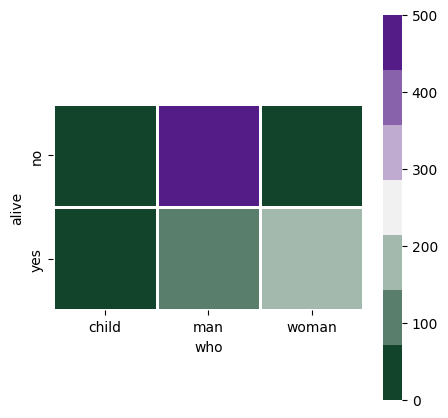

In [ ]:
#AC
plt.figure(figsize=(5,5))
sns.heatmap(tabla_cont,    # lo creamos sobre la tabla de contingencia
            vmin= 0,               # valores para regular la escala de colores
            vmax= 500,
            cmap= sns.diverging_palette(145, 280, s= 85, l=25, n=7), # ver documentación para el mapa de colores
            square= True,     # dimensiones cuadradas
            linewidths=1);     # ancho de las lineas entre recuadros)

# REALMENTE NO ME PARECE MUY BUENA OPCION INCLUIR ESTA GRÁFICA EN MI PRESENTACIÓN, ME QUEDO CON LA ANTERIOR. 
# LO MÁS IMPORTANTE ES QUEDARNOS CON LA ALTA TASA DE SUPERVIVENCIA DE LAS MUJERES FRENTE A LA ALTA TASA DE MORTALIDAD DE LOS HOMBRES.

    SLIDE 2

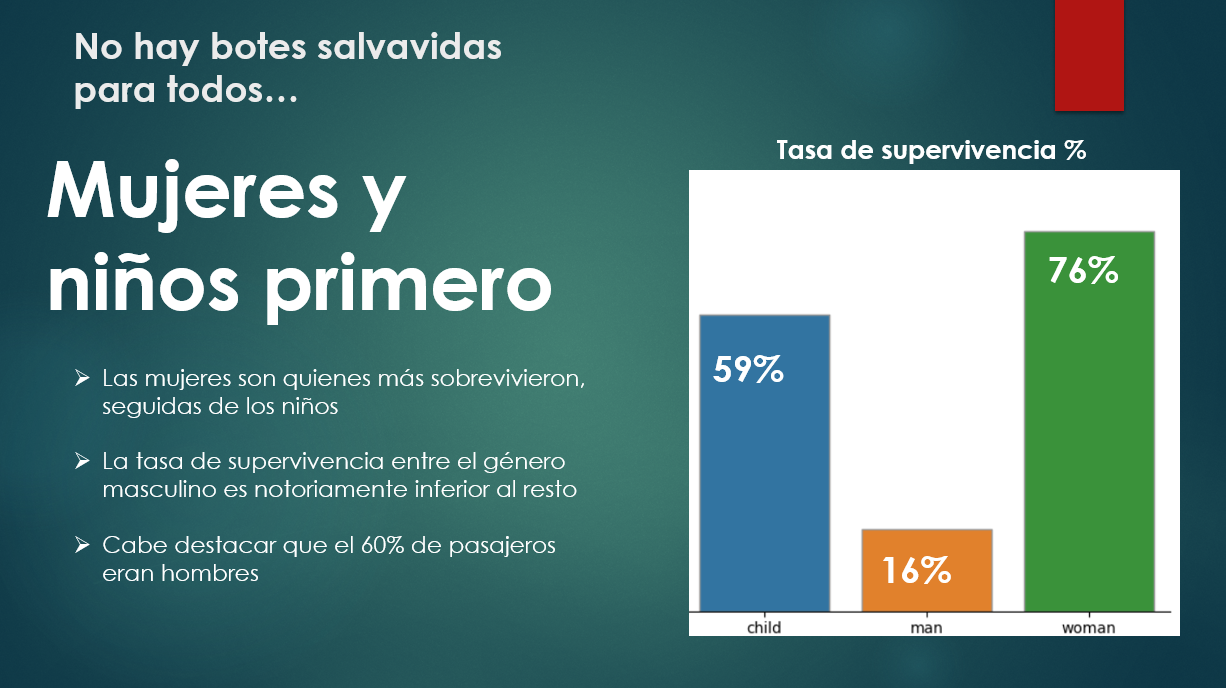

    3. La clase en la que viajes influye en el factor de supervivencia:


In [ ]:
df_titanic["class"].value_counts(normalize=True)*100

# voy a utilizar estos valores para mi presentación, pues considero muy necesario destacar que la mayoría de pasajeros viajaban en tercera

class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64

In [ ]:
# busco las frecuencias relativas de 'alive' por 'class' para mi presentación:

cat_colx = "alive"
cat_coly = "class"

frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas.proportion *= 100 

frecuencias_relativas

class alive  proportion
0   First   yes   62.962963
1   First    no   37.037037
2  Second    no   52.717391
3  Second   yes   47.282609
4   Third    no   75.763747
5   Third   yes   24.236253

    CANDIDATA A APARECER EN MI PRESENTACION -->

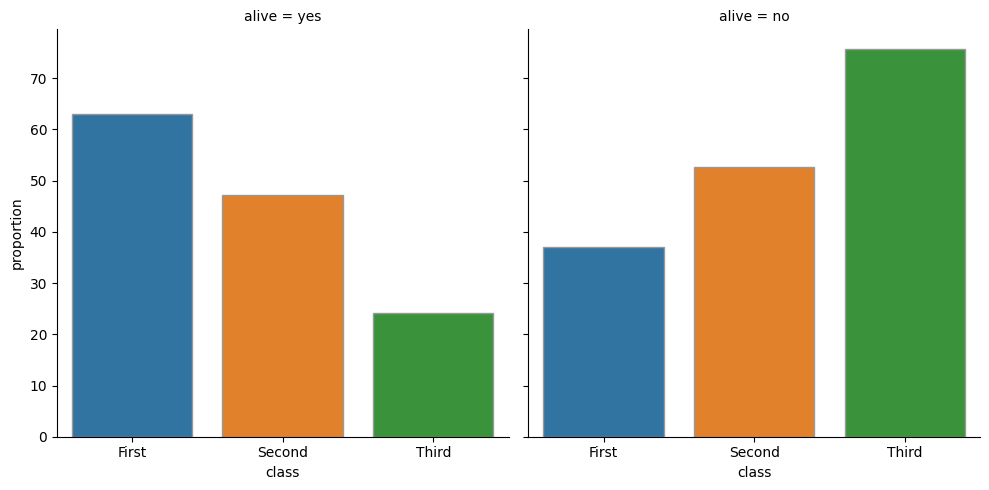

In [ ]:
sns.catplot(x="class",
            y = "proportion",
            col="alive",
            hue = "class",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

# me quedo con la gráfica de los valores 'yes'

    SLIDE 3

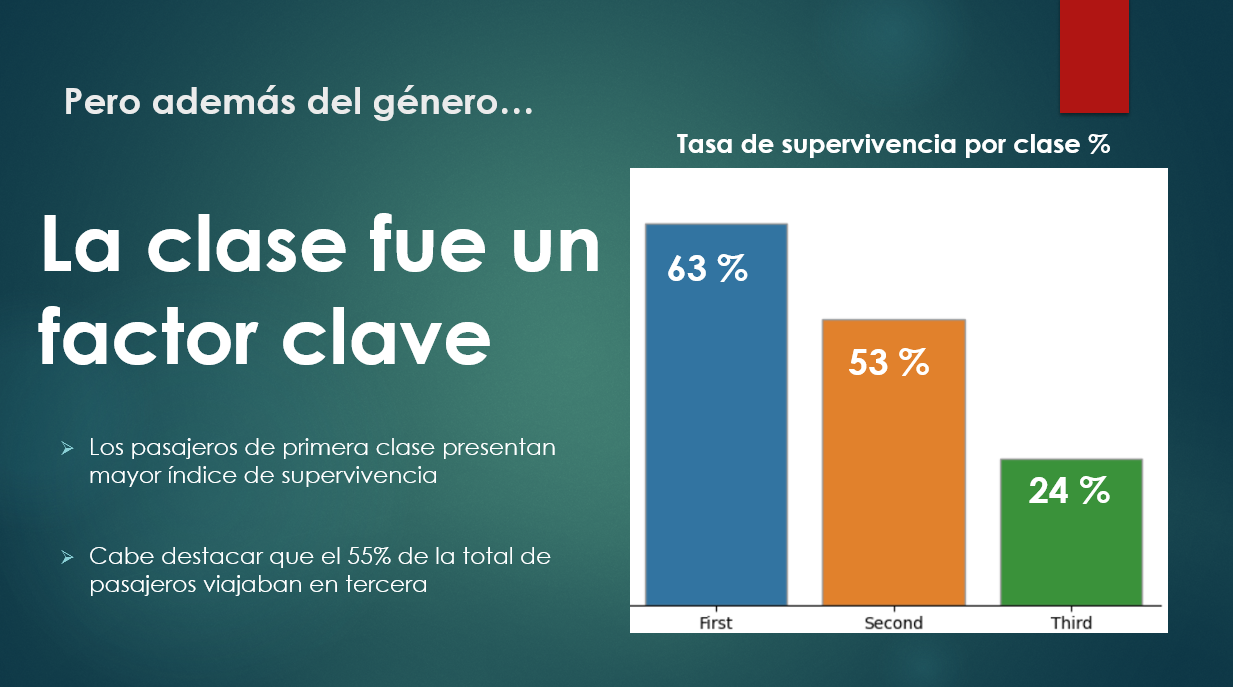

    4. El factor clase también explica la diferencia de tasa de supervivencia entre mujeres y niños:

who     child  man  woman
class                    
First       6  119     91
Second     19   99     66
Third      58  319    114

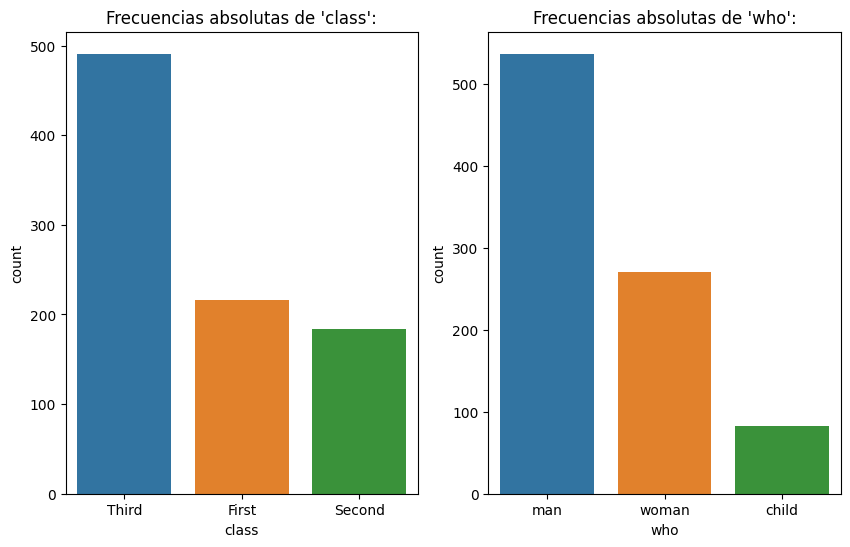

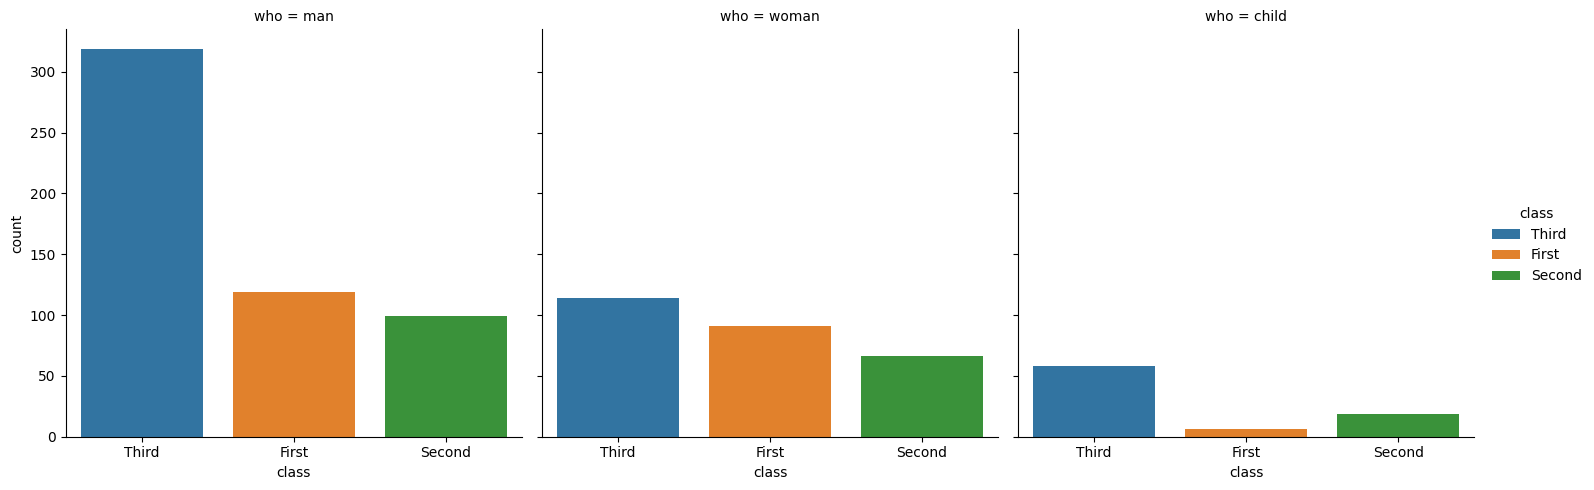

In [ ]:
combina_categoricas(df_titanic, "class","who")    

# sabemos que las mujeres son quienes más sobrevivieron y además casi la mitad de pasajeros de primera eran mujeres
# apenas viajaban niños en primera, donde más viajaban es en tercera, la clase que presenta mayor mortalidad 
# utilizaré la gráfica de barras con las dos variables combinadas presentándola en 2 slides distintas para no abrumar con info

In [ ]:
cat_colx = "who"
cat_coly = "class"

frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas.proportion *= 100 

frecuencias_relativas

class    who  proportion
0   First    man   55.092593
1   First  woman   42.129630
2   First  child    2.777778
3  Second    man   53.804348
4  Second  woman   35.869565
5  Second  child   10.326087
6   Third    man   64.969450
7   Third  woman   23.217923
8   Third  child   11.812627

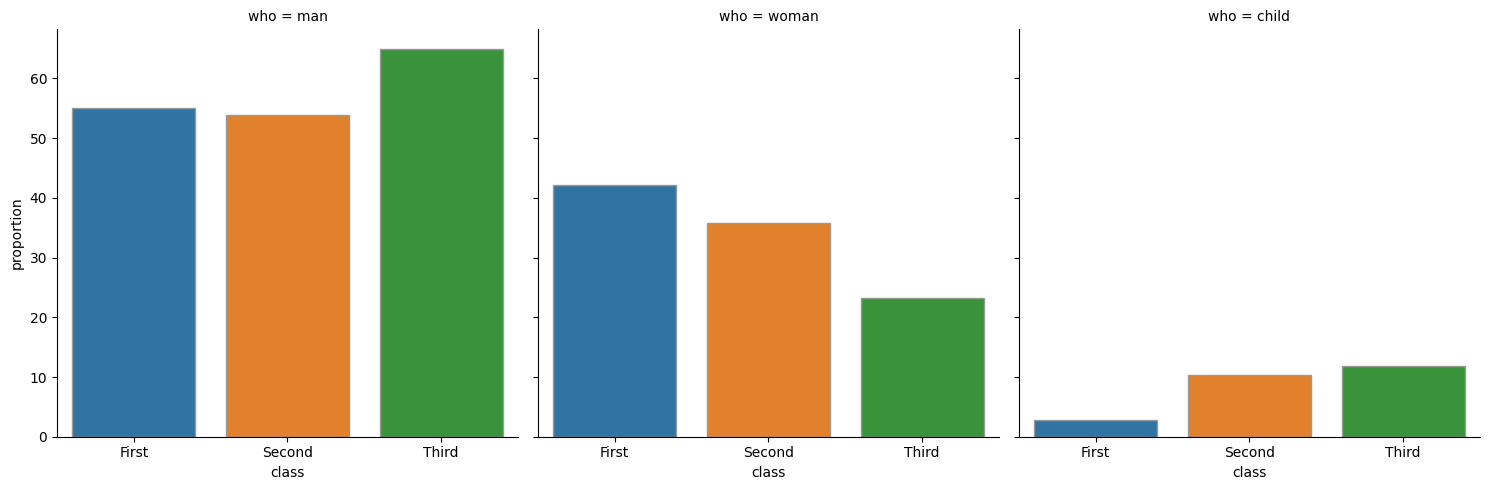

In [135]:
sns.catplot(x="class",
            y = "proportion",
            col="who",
            hue = "class",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);


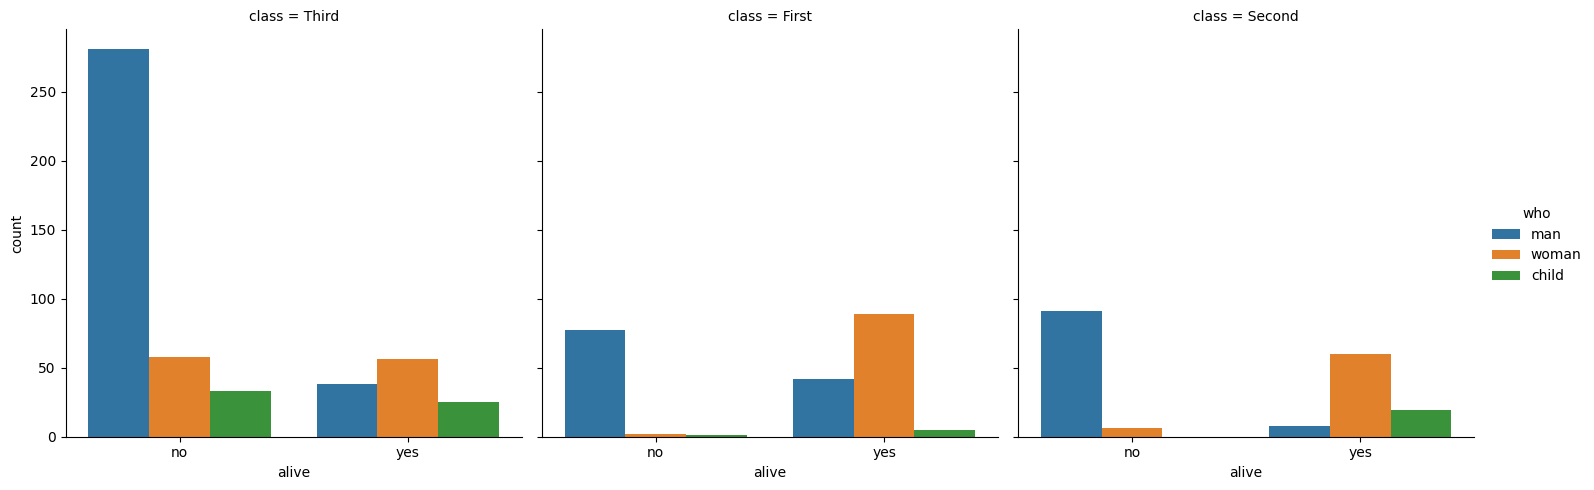

In [ ]:
sns.catplot(x= "alive", col = "class", hue = "who", data = df_titanic, kind = "count");  
# esta gráfica puede resultar muy útil para el análisis pero contiene demasiada info para la presentación

    SLIDES 4 Y 5

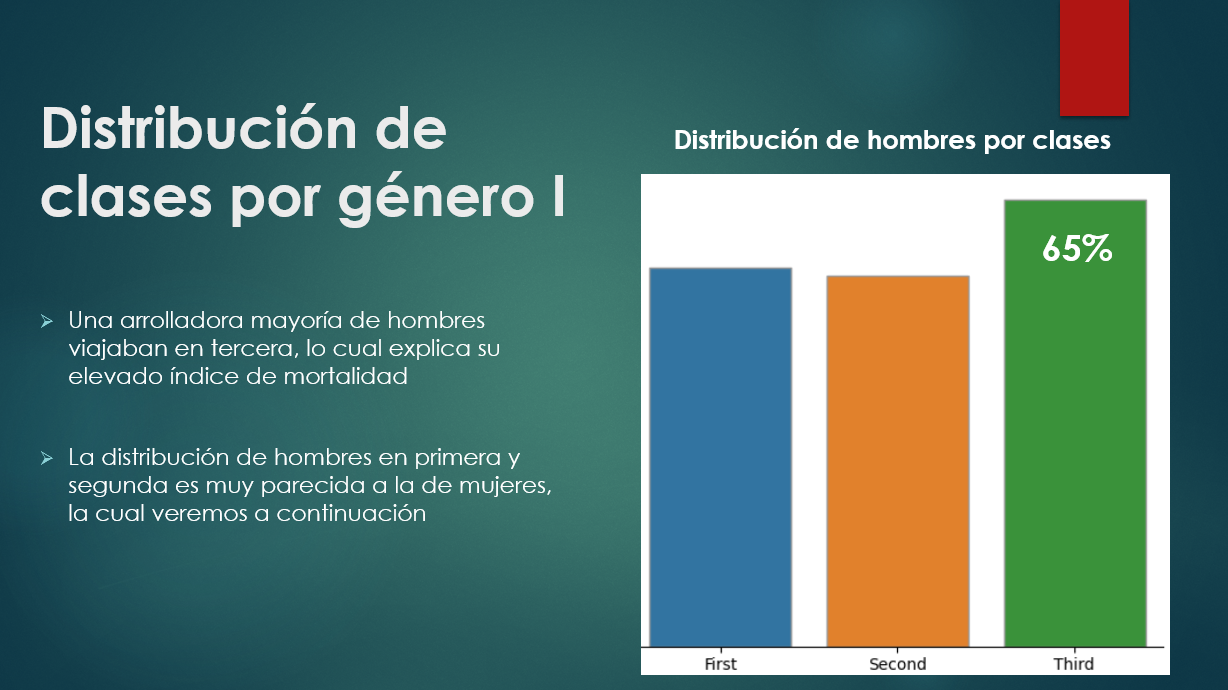

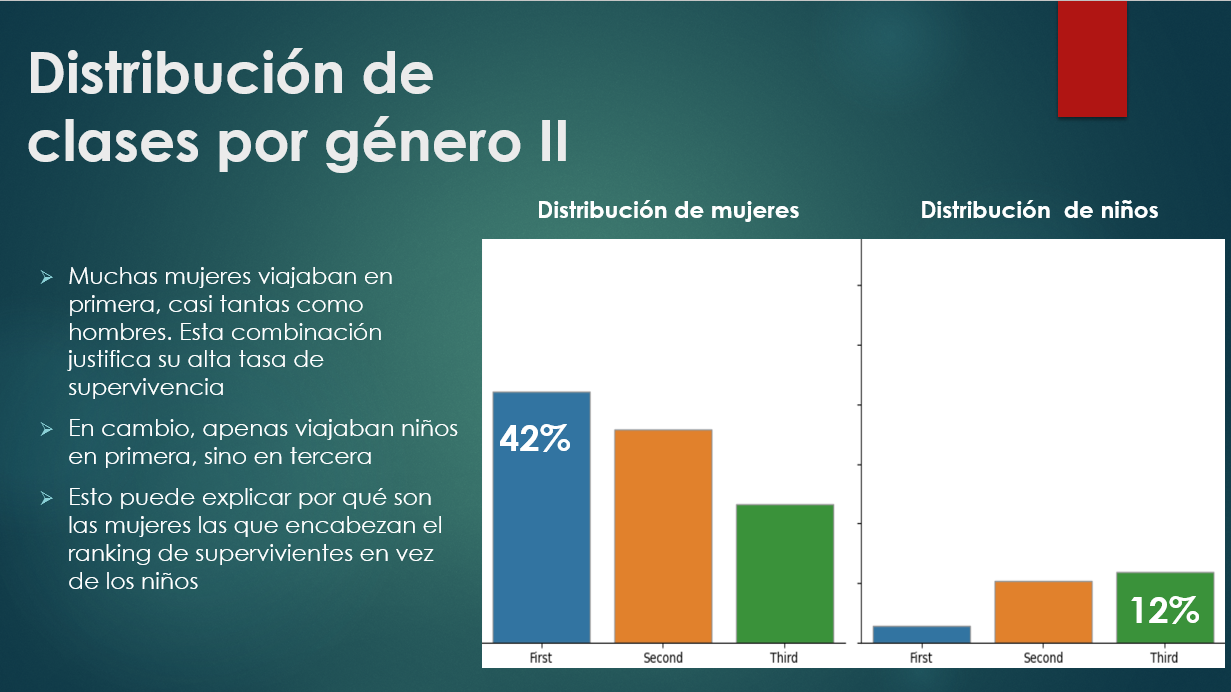

    6. El puerto de embarque pudo influir en la supervivencia

embark_town  Cherbourg  Queenstown  Southampton
alive                                          
no                  75          47          427
yes                 93          30          217

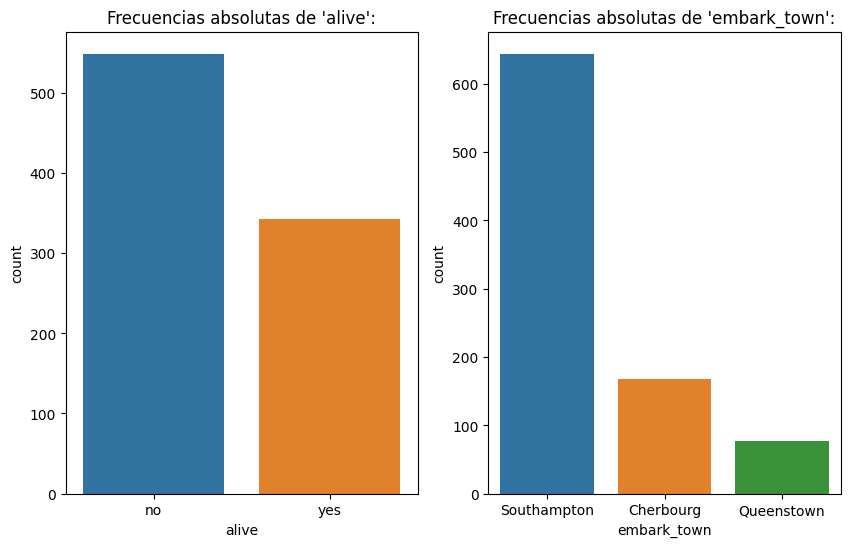

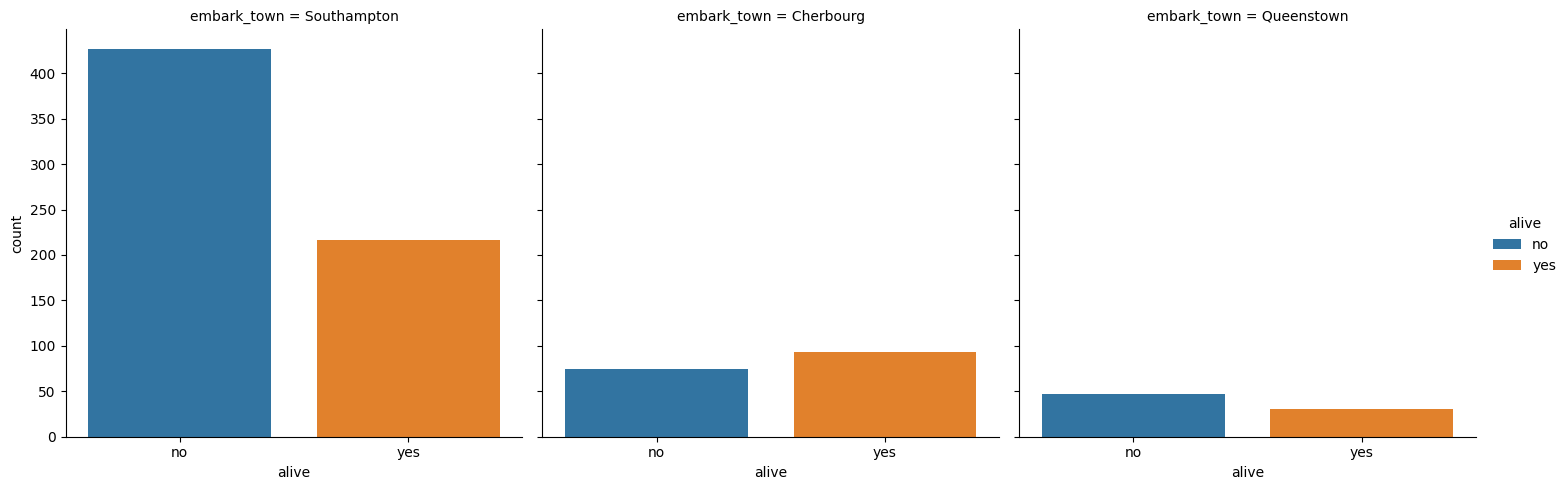

In [ ]:
combina_categoricas(df_titanic, "alive","embark_town")   # destacaremos que l amayoría embarcó en Southampton

In [125]:
df_titanic.embark_town.value_counts(normalize=True)*100

embark_town
Southampton    72.440945
Cherbourg      18.897638
Queenstown      8.661417
Name: proportion, dtype: float64

In [126]:
# busco las frecuencias relativas de 'alive' por 'embark_town' para mi presentación:

cat_colx = "alive"
cat_coly = "embark_town"

frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas.proportion *= 100 

frecuencias_relativas

embark_town alive  proportion
0    Cherbourg   yes   55.357143
1    Cherbourg    no   44.642857
2   Queenstown    no   61.038961
3   Queenstown   yes   38.961039
4  Southampton    no   66.304348
5  Southampton   yes   33.695652

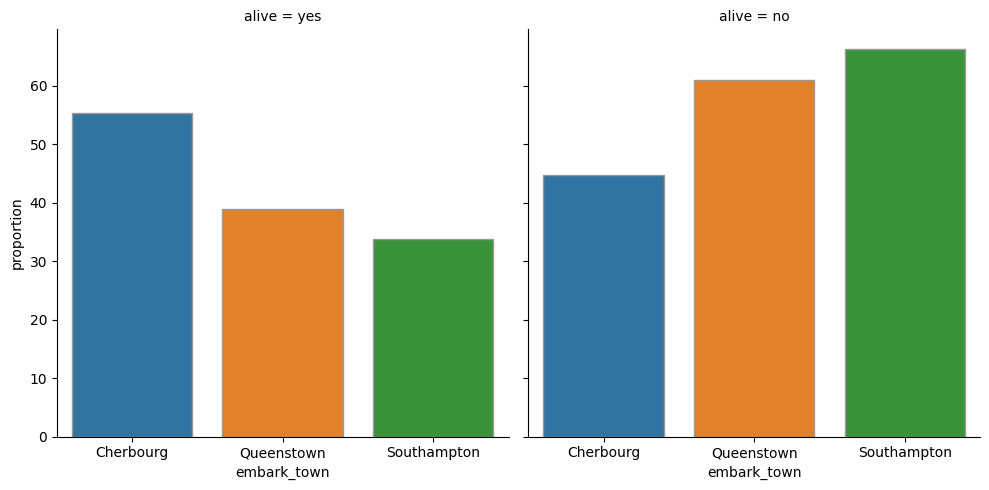

In [129]:
sns.catplot(x="embark_town",
            y = "proportion",
            col="alive",
            hue = "embark_town",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

# me quedo con la gráfica de los valores 'yes'

In [ ]:
# repito la gráfica combinando esta vez 'class' y 'embark_town'


cat_colx = "class"
cat_coly = "embark_town"

frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas.proportion *= 100 

frecuencias_relativas    # muestro alguno de estos valores en mi presentación para apoyar el hecho de que el puerto de embarque no importa tanto como la clase predominante

embark_town   class  proportion
0    Cherbourg   First   50.595238
1    Cherbourg   Third   39.285714
2    Cherbourg  Second   10.119048
3   Queenstown   Third   93.506494
4   Queenstown  Second    3.896104
5   Queenstown   First    2.597403
6  Southampton   Third   54.813665
7  Southampton  Second   25.465839
8  Southampton   First   19.720497

    SLIDE 6

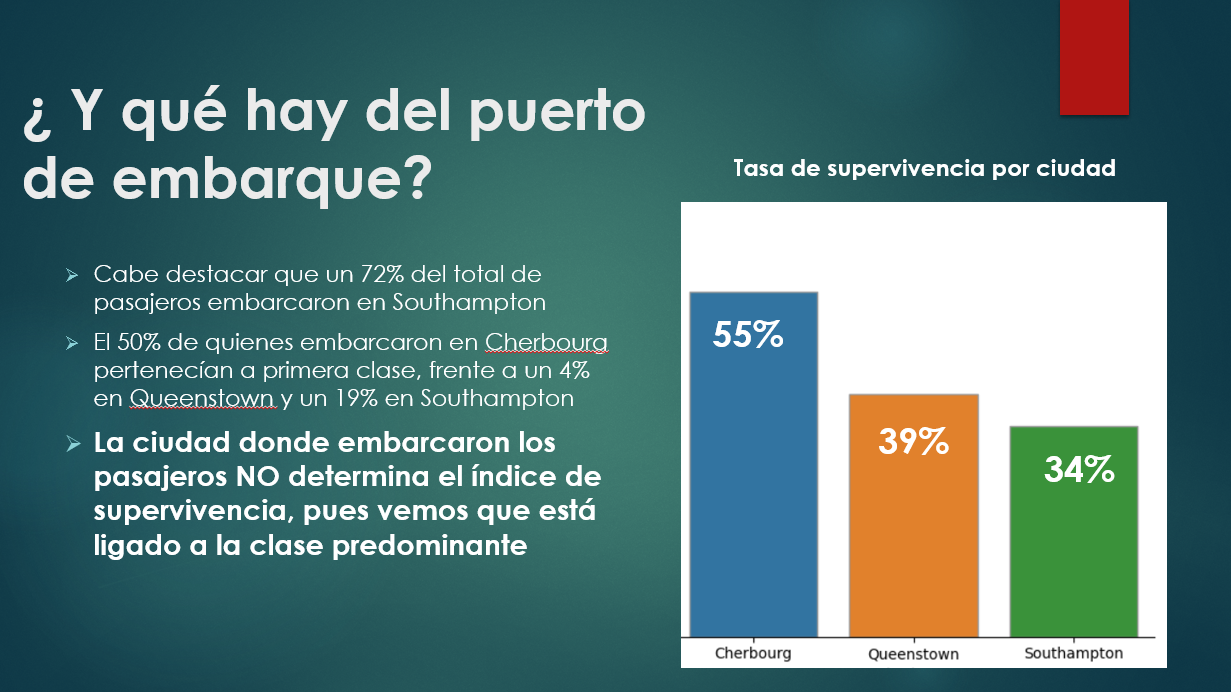

    CONLUSIONES

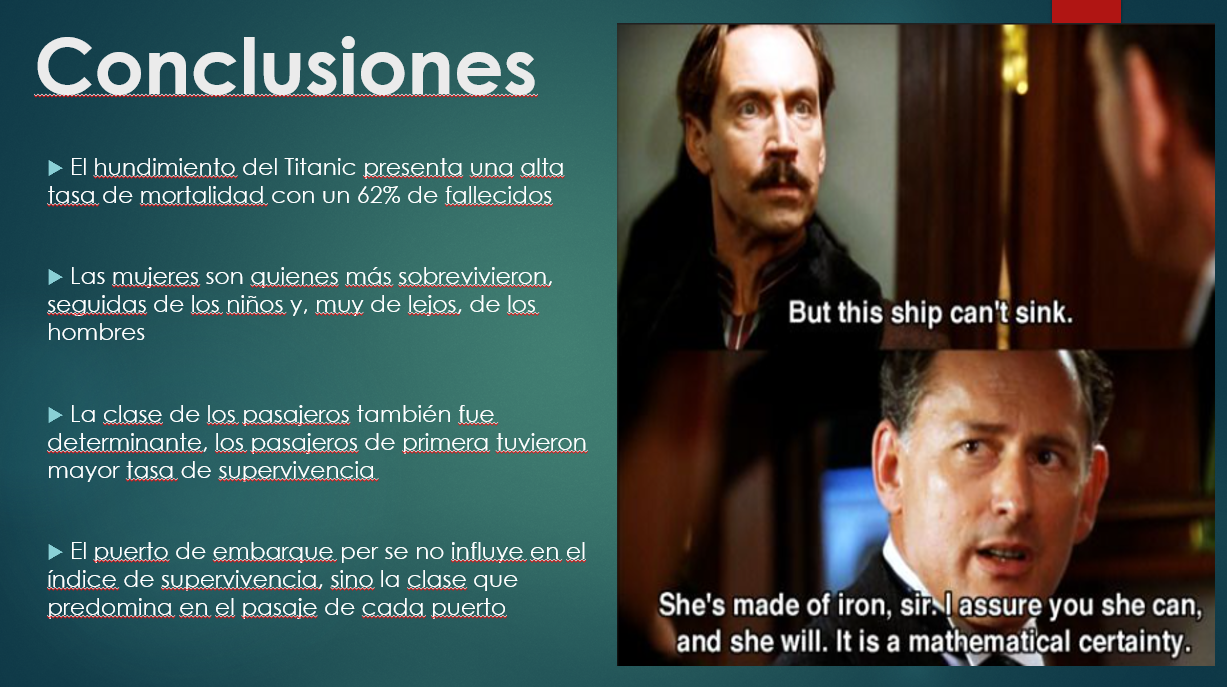